In [5]:
%%time
import numpy as np
from scipy.integrate import dblquad
from math import sin, cos, pi, log1p
import matplotlib.pyplot as plt

K = np.arange(0.2, 0.7 , 0.0005) # temperature
k12 = 2 * np.sinh(2 * K) / np.cosh(2 * K)**2 
f = np.log(2 * np.cosh(2 * K))  # free energy

for k in range(len(K)):
    integrant = lambda y, x: log1p(- k12[k] * cos(x) * cos(y))
    f[k] += 0.5 / pi**2 * dblquad(integrant, 0, pi, lambda x: 0, lambda x: pi)[0]

E = - np.gradient(f, K, edge_order=2)
# C = - np.gradient(E, K, edge_order=2)

CPU times: total: 281 ms
Wall time: 3.13 s


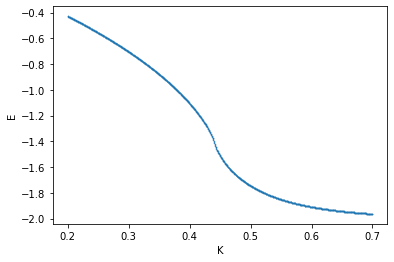

In [6]:
plt.plot(K, E, linewidth="0", marker=".", markersize=1)
plt.xlabel('K')
plt.ylabel('E')
plt.show()

# plt.plot(K, C, linewidth="0", marker=".", markersize=1)
# plt.xlabel('K')
# plt.ylabel('C')
# plt.show()